# Plot STATS

In [74]:
import os
import json
import matplotlib.pyplot as plt

In [75]:
BASE_DIR = "plot/"  

def load_results_flat(base_dir=BASE_DIR):
    all_data = {}  # {n: {model: metrics}}
    for fname in sorted(os.listdir(base_dir)):
        if fname.endswith(".json"):
            n_part = os.path.splitext(fname)[0]
            try:
                n = int(n_part)
            except ValueError:
                continue
            json_path = os.path.join(base_dir, fname)
            with open(json_path, "r") as f:
                all_data[n] = json.load(f)
    return all_data

all_data = load_results_flat()
print(all_data.keys())

dict_keys([10, 12, 14, 16, 18, 2, 20, 4, 6, 8])


In [76]:
def plot_metric(all_data, metric, ylabel, title, log_y=False):
    plt.figure(figsize=(8, 5))
    models = sorted({m for data in all_data.values() for m in data.keys()})

    for model in models:
        ns = []
        values = []
        for n in sorted(all_data.keys()): # all_data = {n: {model: metrics}}
            data = all_data[n].get(model)
            val = data.get(metric) if data else None
            if val is not None:
                ns.append(n)
                values.append(val)
        if ns:
            plt.plot(ns, values, marker='o', label=model)
    plt.xlabel("Number of Teams (n)")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    if log_y:
        plt.yscale("log")
    plt.xticks(sorted(all_data.keys()))  
    plt.show()

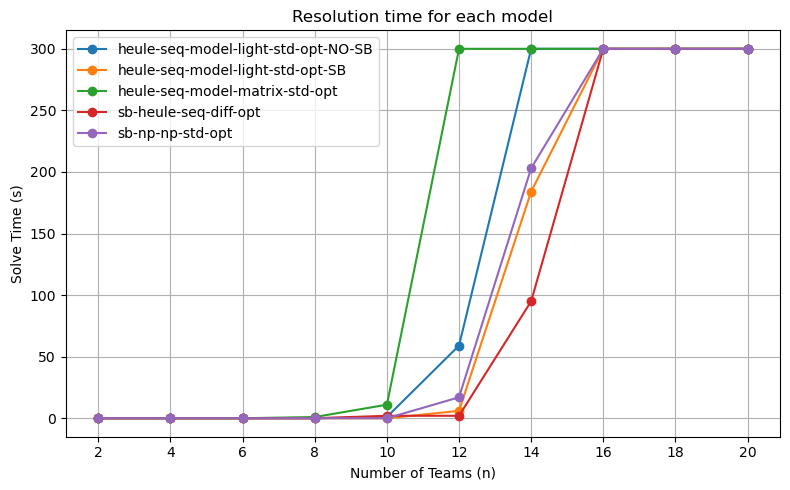

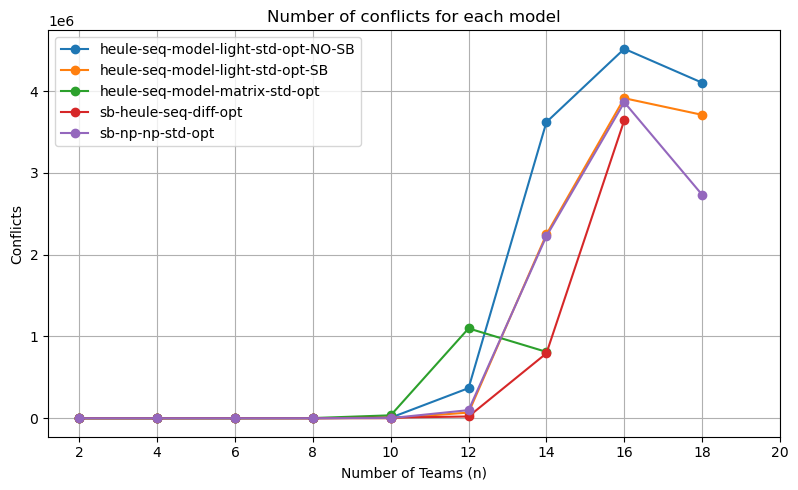

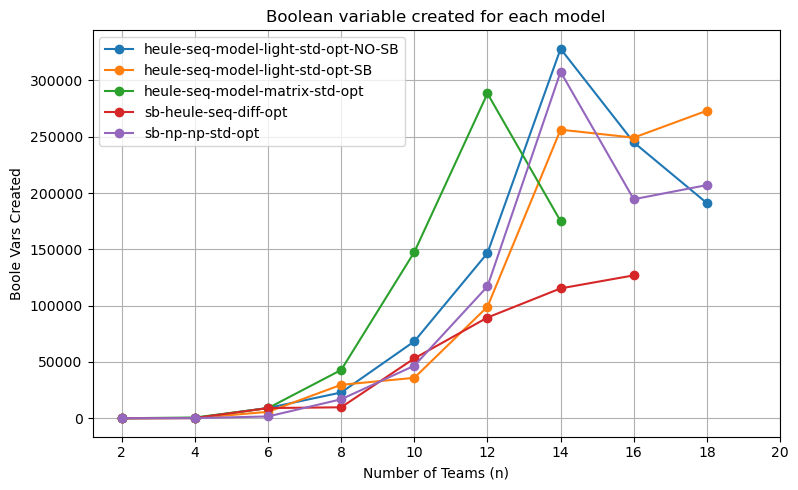

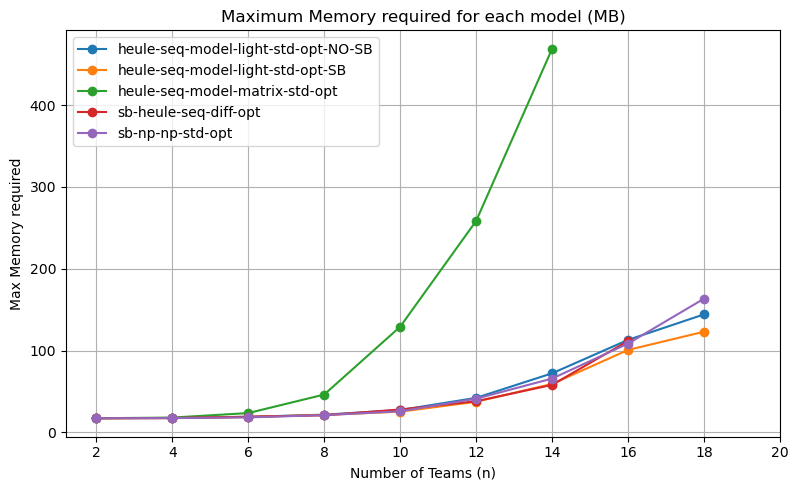

In [77]:
plot_metric(
    all_data,
    metric="time",
    ylabel="Solve Time (s)",
    title="Resolution time for each model"
)

plot_metric(
    all_data,
    metric="conflicts",
    ylabel="Conflicts",
    title="Number of conflicts for each model"
)

plot_metric(
    all_data,
    metric="mk_bool_var",
    ylabel="Boole Vars Created",
    title="Boolean variable created for each model"
)

plot_metric(
    all_data,
    metric="max_memory",
    ylabel="Max Memory required",
    title="Maximum Memory required for each model (MB)"
)

# Plot solvers comparisons

In [78]:
all_data = load_results_flat(base_dir='compare_solvers')

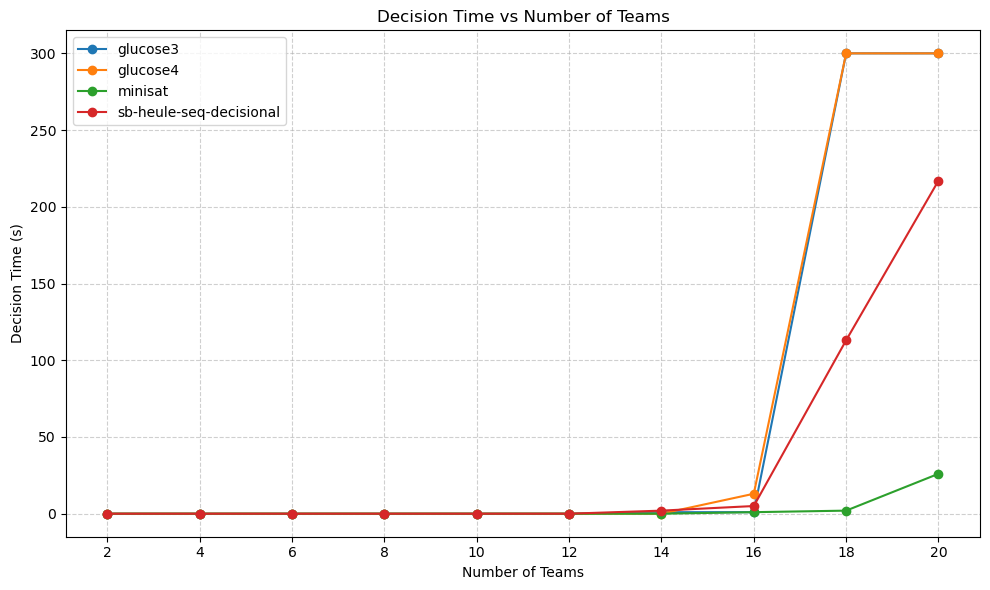

In [79]:
def plot_decision_times(all_data):
    solver_names = set()
    for models in all_data.values():
        solver_names.update(models.keys())
    solver_names = sorted(solver_names)

    data_by_solver = {solver: [] for solver in solver_names}
    ns = sorted(all_data.keys())

    for n in ns:
        models = all_data[n]
        for solver in solver_names:
            time = models.get(solver, {}).get("time", None)
            data_by_solver[solver].append(time)

    plt.figure(figsize=(10, 6))
    for solver in solver_names:
        plt.plot(ns, data_by_solver[solver], marker="o", label=solver)

    plt.xlabel("Number of Teams")
    plt.ylabel("Decision Time (s)")
    plt.title("Decision Time vs Number of Teams")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.xticks(sorted(all_data.keys()))  
    plt.show()


plot_decision_times(all_data)